In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix , classification_report

In [4]:
from sklearn.cluster import KMeans

In [5]:
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()

In [13]:
x = scale(iris.data)
y = pd.DataFrame(data.target)
x[1:10]


array([[-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [19]:
model = KMeans(n_clusters = 3)
model.fit(x)

KMeans(n_clusters=3)

In [22]:
iris_df = pd.DataFrame(iris.data)

In [23]:
iris_df.columns = ['sl','sw','pl','pw']

In [24]:
y.columns = ['target']

In [25]:
iris_df.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
import seaborn as sns
%matplotlib inline

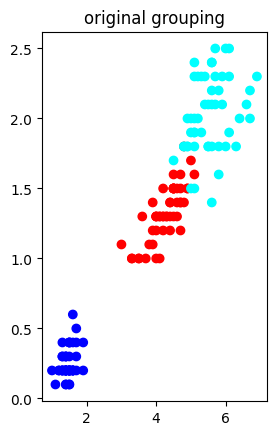

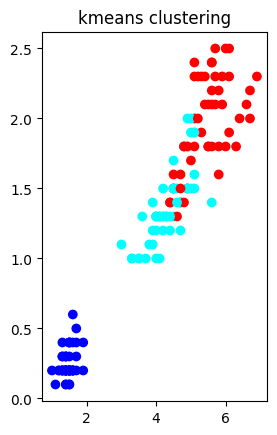

In [36]:
color_theme = np.array(['blue','red','cyan'])
plt.subplot(1,2,1)
plt.scatter(x = iris_df.pl , y = iris_df.pw , c = color_theme[iris.target])
plt.title("original grouping")
plt.show()

plt.subplot(1,2,2)
plt.scatter(x = iris_df.pl , y = iris_df.pw , c = color_theme[model.labels_])
plt.title("kmeans clustering")
plt.show()


In [38]:
relabel = np.choose(model.labels_ , [0,2,1]).astype(np.int64)

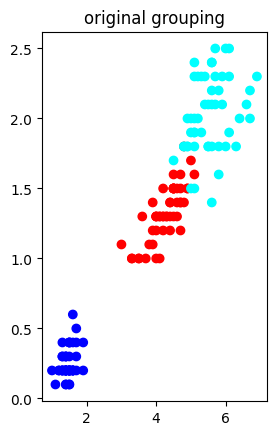

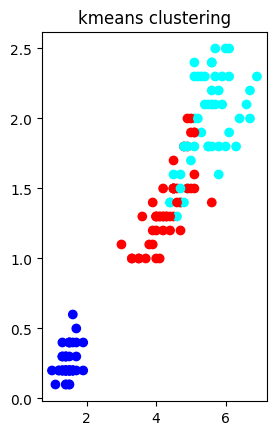

In [39]:
color_theme = np.array(['blue','red','cyan'])
plt.subplot(1,2,1)
plt.scatter(x = iris_df.pl , y = iris_df.pw , c = color_theme[iris.target])
plt.title("original grouping")
plt.show()

plt.subplot(1,2,2)
plt.scatter(x = iris_df.pl , y = iris_df.pw , c = color_theme[relabel])
plt.title("kmeans clustering")
plt.show()

In [42]:
print(classification_report(y , relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.78      0.76      0.77        50
           2       0.76      0.78      0.77        50

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150

